<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:brown;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Gender and Age Detection
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Project Objective:- Gender and Age Detection <br>

<b>Project Description</b><br>

💡 This project focuses on developing a gender and age detection system using computer vision and machine learning techniques.<br>
💡 The system will analyze images to accurately predict the gender (male/female/other) and age of individuals. <br>
💡 The project will involve data collection, pre-processing, feature extraction, model training, and evaluation.<br>
💡 The expected outcome is a robust and accurate gender and age detection system with potential for real-time applications in fields such as social media analytics, targeted advertising, and human-computer interaction.<br>
    
<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color:aliceblue;"><b> Author:- </b> Rahul Kumar</h2>
</div> 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Importing Packages
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Dataset
</p>
</div>

In [2]:
data = pd.read_csv("../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Analyzing & Cleaning Data
</p>
</div>

In [3]:
df = data.drop('img_name', axis=1)
df.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [4]:
def basic_eda(df):
    print("\n Shape: ")
    print(df.shape)
    print("\n\n --------- ")
    print("\n Number of null values: ")
    print(df.isnull().sum())
    print("\n\n --------- ")
    print("\n Value count of age: ")
    print(df['age'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of ethnicity: ")
    print(df['ethnicity'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of gender: ")
    print(df['gender'].value_counts())

In [5]:
basic_eda(df)


 Shape: 
(23705, 4)


 --------- 

 Number of null values: 
age          0
ethnicity    0
gender       0
pixels       0
dtype: int64


 --------- 

 Value count of age: 
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64


 --------- 

 Value count of ethnicity: 
0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64


 --------- 

 Value count of gender: 
0    12391
1    11314
Name: gender, dtype: int64


## Dividing Target Variables.

In [6]:
columns = ["age", "gender", "ethnicity"]
y = df.drop("pixels", axis=1)
X = df.drop(columns, axis=1)

In [7]:
X.head()

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...


In [8]:
y.head()

,age,ethnicity,gender
0,1,2,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0


In [9]:
y.nunique()

age          104
ethnicity      5
gender         2
dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis
</p>
</div>

## Gender & Age Distribution Visualization

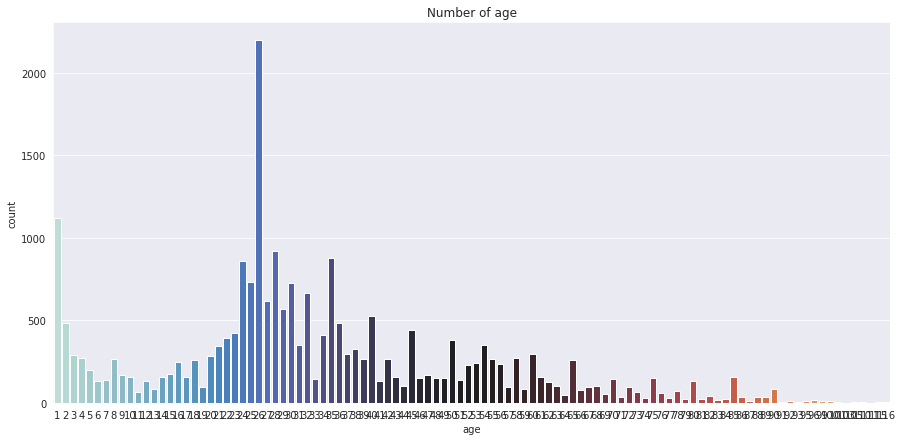

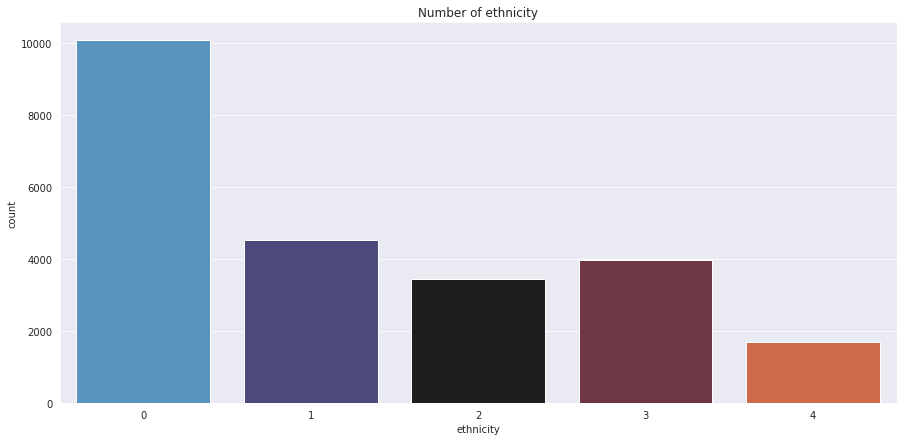

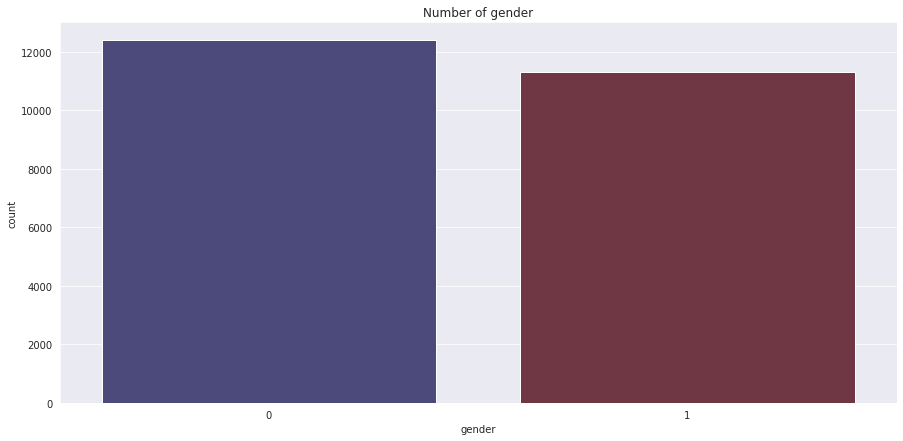

In [10]:
for i in y.columns:
    plt.figure(figsize=(15,7))
    g = sns.countplot(y[i], palette="icefire")
    plt.title("Number of {}".format(i))

## Age Group Distribution Visualization

Text(0.5, 1.0, 'Number of age')

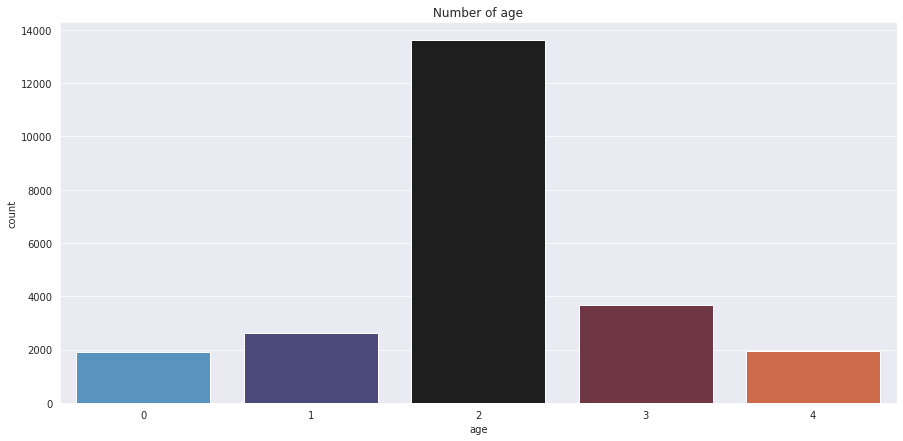

In [11]:
y["age"] = pd.cut(y["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])
plt.figure(figsize=(15,7))
g = sns.countplot(y["age"], palette="icefire")
plt.title("Number of age")

## Image shape

In [12]:
num_pixels = len(X['pixels'][0].split(" "))
img_height = int(np.sqrt(len(X['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(X['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)


2304 48 48


## Reshape data

In [13]:
X = pd.Series(X['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x:np.array(list(map(lambda z:np.int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

# reshape data
X = X.reshape(-1, 48, 48, 1)
print("X shape: ", X.shape)

X shape:  (23705, 48, 48, 1)


## Image Overview

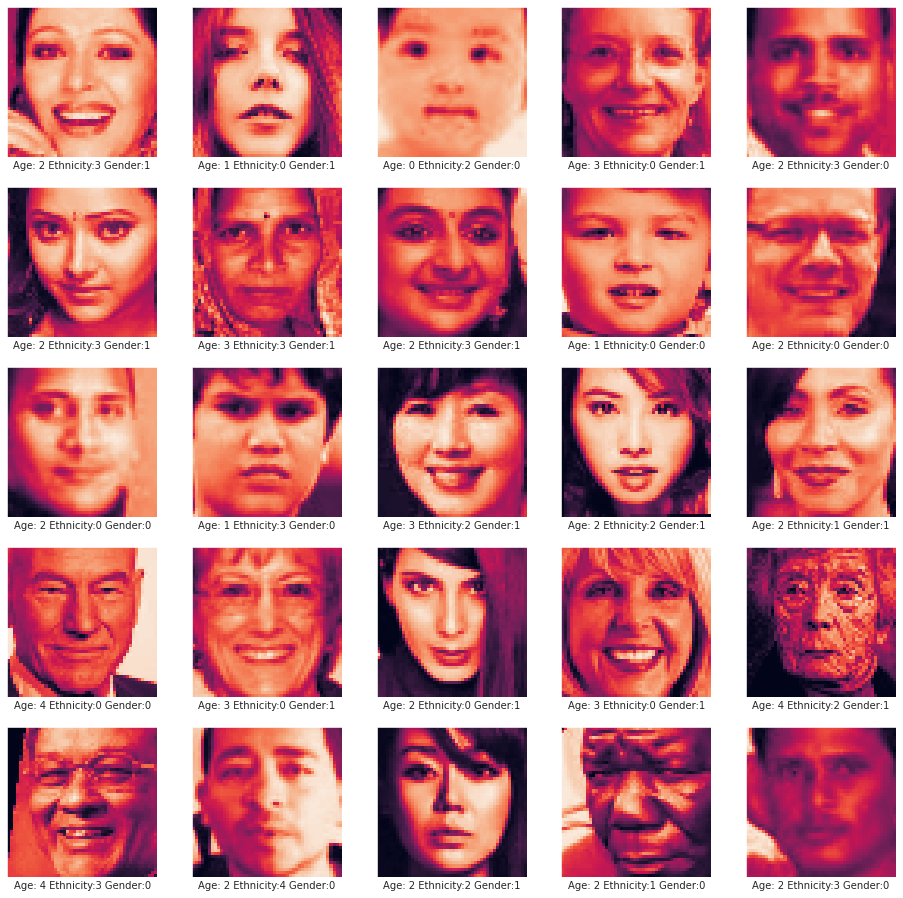

In [14]:
plt.figure(figsize=(16,16))
for i,a in zip(np.random.randint(0, 23705, 25), range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(
    "Age: "+str(y['age'].iloc[i])+
    " Ethnicity:"+str(y['ethnicity'].iloc[i])+
    " Gender:"+str(y['gender'].iloc[i]))
plt.show()

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Building Neural Networks for AGE & GENDER.
 </p>
</div>


In [15]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy

## Categorizing target values

In [16]:
age_matrix = np.array(y['age'])
gender_matrix = np.array(y['gender'])
ethnicity_matrix = np.array(y['ethnicity'])
age = to_categorical(age_matrix, num_classes = 5)
gender = to_categorical(y["gender"], num_classes = 2)
ethnicity = to_categorical(ethnicity_matrix, num_classes = 5)
print(age, gender, ethnicity)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


##  Normalize the data

In [17]:
X = X / 255
X = X / 255

## Image Data Generator

In [18]:
datagen = ImageDataGenerator(
        featurewise_center = False,
    # set input mean to 0 over the dataset
       samplewise_center = False,
    # set each sample mean to 0 
       featurewise_std_normalization = False,
    # divide inputs by std of the dataset
       samplewise_std_normalization=False,  
    # divide each input by its std
       zca_whitening=False,
    # dimesion reduction
       rotation_range=5, 
    # randomly rotate images in the range 5 degrees
       zoom_range = 0.1,
    # Randomly zoom image 10%
       width_shift_range=0.1, 
    # randomly shift images horizontally 10%
       height_shift_range=0.1,  
    # randomly shift images vertically 10%
       horizontal_flip=False,  
    # randomly flip images
        vertical_flip=False  # randomly flip images
)

datagen.fit(X)

## Train Test Split

In [19]:
# Ethnicity
from sklearn.model_selection import train_test_split
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(X,ethnicity, test_size=0.3, random_state=42)

# Gender
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X, gender, test_size=0.3, random_state=42)

# Age
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X, age, test_size=0.3, random_state=42)

In [20]:
print(X_train_ethnicity.shape, X_train_gender.shape, X_train_age.shape)

(16593, 48, 48, 1) (16593, 48, 48, 1) (16593, 48, 48, 1)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Buliding CNN Model
</p>
</div>

In [21]:
def my_model(num_classes, activation, loss):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3,3),activation="relu",padding="same"))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256,activation="relu"))
    model.add(Dense(num_classes, activation=activation))
    
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model

## Callbacks

In [22]:
early_stopping = EarlyStopping(patience=10, 
                               min_delta=0.001,
                               restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                           patience = 2,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr = 0.00001)

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Age Prediction
</p>
</div>

In [27]:
model_age = my_model(5,"softmax",'categorical_crossentropy')
history_age = model_age.fit(X_train_age, y_train_age, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test_age,y_test_age), 
                            steps_per_epoch= X_train_age.shape[0] // batch_size, 
                            callbacks= [early_stopping, 
                            learning_rate_reduction])

Epoch 1/500
259/259 [==============================] - 3s 8ms/step - loss: 0.9467 - accuracy: 0.6499 - val_loss: 1.7436 - val_accuracy: 0.0828
Epoch 2/500
259/259 [==============================] - 2s 7ms/step - loss: 0.7266 - accuracy: 0.7189 - val_loss: 3.2549 - val_accuracy: 0.0897
Epoch 3/500
259/259 [==============================] - 2s 7ms/step - loss: 0.6586 - accuracy: 0.7418 - val_loss: 1.8711 - val_accuracy: 0.6062
Epoch 4/500
259/259 [==============================] - 2s 8ms/step - loss: 0.6200 - accuracy: 0.7604 - val_loss: 5.5009 - val_accuracy: 0.1696
Epoch 5/500
259/259 [==============================] - 2s 7ms/step - loss: 0.5857 - accuracy: 0.7703 - val_loss: 6.1940 - val_accuracy: 0.1069
Epoch 6/500
259/259 [==============================] - 2s 8ms/step - loss: 0.5515 - accuracy: 0.7847 - val_loss: 1.7339 - val_accuracy: 0.5454
Epoch 7/500
259/259 [==============================] - 2s 8ms/step - loss: 0.5288 - accuracy: 0.7893 - val_loss: 2.4004 - val_accuracy: 0.2604

### Plotting model performance

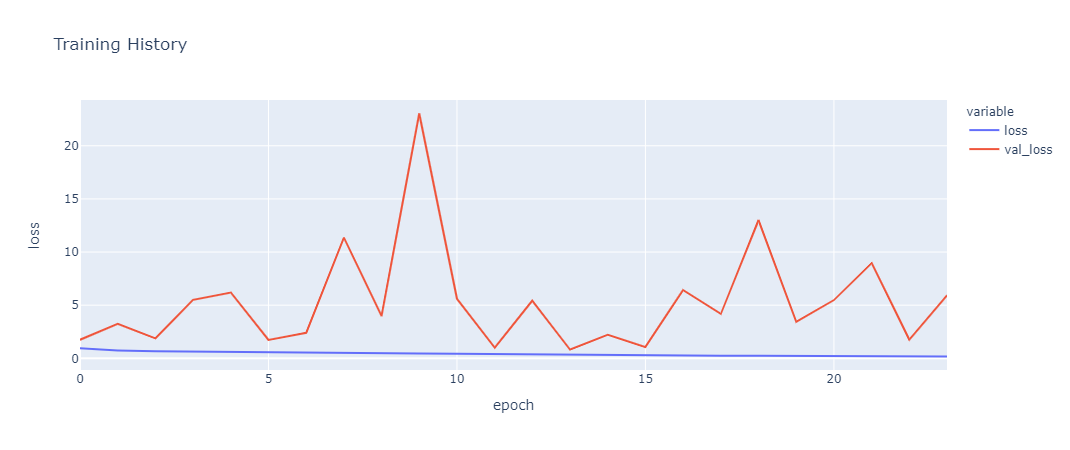

In [28]:
fig = px.line(
    history_age.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

### Loss & Accuracy

In [29]:
loss, acc = model_age.evaluate(X_test_age, y_test_age, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.8241706490516663
Test Accuracy: 0.7045838236808777


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Gender Prediction
</p>
</div>

In [31]:
model_gender = my_model(2, "sigmoid", "binary_crossentropy")
history_gender = model_gender.fit(X_train_gender, y_train_gender, 
                                 batch_size = batch_size,
                                 epochs = epochs,
                                 validation_data = (X_test_gender, y_test_gender),
                                 steps_per_epoch = X_train_gender.shape[0] // batch_size, callbacks=[early_stopping,learning_rate_reduction])


Epoch 1/500
259/259 [==============================] - 3s 9ms/step - loss: 0.4896 - accuracy: 0.7694 - val_loss: 0.6910 - val_accuracy: 0.5260
Epoch 2/500
259/259 [==============================] - 2s 8ms/step - loss: 0.3584 - accuracy: 0.8375 - val_loss: 2.0815 - val_accuracy: 0.5260
Epoch 3/500
259/259 [==============================] - 2s 7ms/step - loss: 0.3178 - accuracy: 0.8559 - val_loss: 0.3414 - val_accuracy: 0.8543
Epoch 4/500
259/259 [==============================] - 2s 7ms/step - loss: 0.3014 - accuracy: 0.8682 - val_loss: 0.4176 - val_accuracy: 0.8123
Epoch 5/500
259/259 [==============================] - 2s 7ms/step - loss: 0.2794 - accuracy: 0.8792 - val_loss: 0.2854 - val_accuracy: 0.8777
Epoch 6/500
259/259 [==============================] - 2s 7ms/step - loss: 0.2618 - accuracy: 0.8859 - val_loss: 0.2804 - val_accuracy: 0.8817
Epoch 7/500
259/259 [==============================] - 2s 7ms/step - loss: 0.2449 - accuracy: 0.8952 - val_loss: 0.2667 - val_accuracy: 0.8861

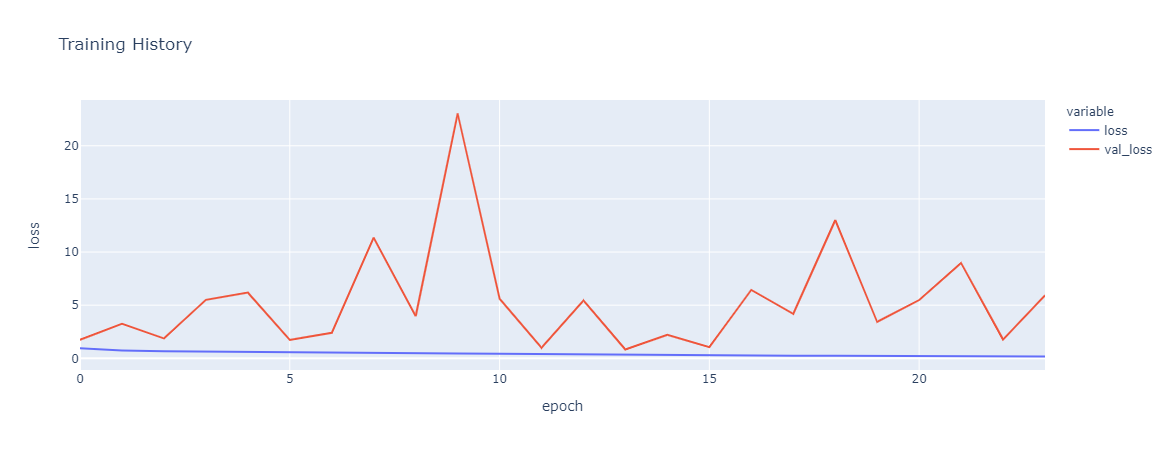

In [34]:
fx = px.line(
    history_gender.history, y=["loss", "val_loss"],
    labels = {'index':'epoch', 'value':'loss'},
    title = 'Training History')

fig.show()

### Loss and Accuracy

In [35]:
loss, acc = model_gender.evaluate(X_test_gender, y_test_gender, verbose=0)
print("Test loss: {}".format(loss))
print("Test Accuracy: {}".format(acc))

Test loss: 0.2666991949081421
Test Accuracy: 0.8861079812049866


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Conclusion
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Conclusion</b><br>
    
💡 This project has successfully predicted gender and age detection system using machine learning techniques.<br>
💡 The system leverages data collection, pre-processing, model training, and evaluation to accurately predict the gender and age group of individuals from images.<br>
💡 The visualization of the gender and age distribution provides insights into the demographics of the analyzed data.<br> 
💡 The project's outcomes have potential applications in various domains, such as social media analytics, targeted advertising, and human-computer interaction.<br>
💡 The project's success is evident in the robust and accurate performance of the gender and age detection system.<br>
</div>

---